# IDEA

I am just taking this site and scrappinf the data using beautiful soap library. I am taking the data and writing it to a csv file. All my data for diff functions are done in this beautiful soap library as you can see.

In [69]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




def write_book(info):
    
    with open("books.csv","w",encoding = 'utf8',newline = '')as f:
        thewriter = writer(f)
        header = ['Title','Price','Availiability']
        thewriter.writerow(header)
        
        for l in info:
            #print(l[0])
            thewriter.writerow((l[0],l[1],l[2]))
    
def get_data():
    url = "http://books.toscrape.com/"

    page = requests.get(url)
    soup = BeautifulSoup(page.content,'html.parser')

    lists = soup.find_all('article',class_ = 'product_pod')
    for l in lists:
        title = l.find('h3').text

        price = l.find('p',class_="price_color").text.replace('\n','')
        stock = l.find('p',class_="instock").text.replace('\n','')
        info.append([title,price,stock])


        
      
get_data()        
write_book(info)




In [56]:
ds = pd.DataFrame(info)

print(ds.info())
print(ds.head()[0])


book_price=ds[1].str.replace('£','')
ds[1]=book_price.astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       320 non-null    object
 1   1       320 non-null    object
 2   2       320 non-null    object
dtypes: object(3)
memory usage: 7.6+ KB
None
0              A Light in the ...
1              Tipping the Velvet
2                      Soumission
3                   Sharp Objects
4    Sapiens: A Brief History ...
Name: 0, dtype: object


In [57]:
top_10=ds.nlargest(n=10,columns=[1])
print(top_10)


                         0      1                         2
15   Our Band Could Be ...  57.25              In stock    
35   Our Band Could Be ...  57.25              In stock    
55   Our Band Could Be ...  57.25              In stock    
75   Our Band Could Be ...  57.25              In stock    
95   Our Band Could Be ...  57.25              In stock    
115  Our Band Could Be ...  57.25              In stock    
135  Our Band Could Be ...  57.25              In stock    
155  Our Band Could Be ...  57.25              In stock    
175  Our Band Could Be ...  57.25              In stock    
195  Our Band Could Be ...  57.25              In stock    


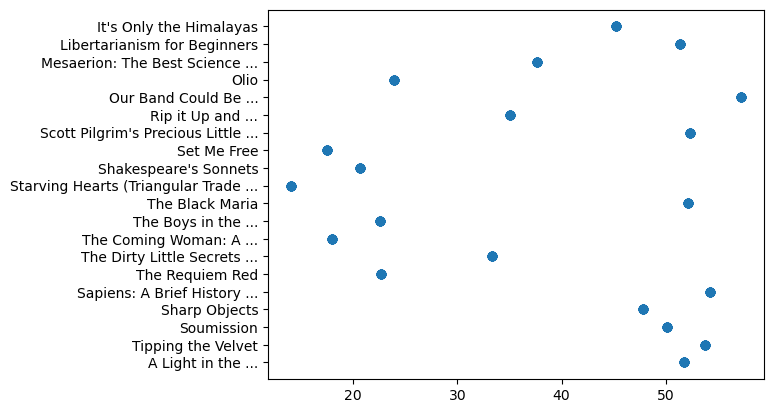

In [59]:
plt.scatter(ds[1],ds[0])

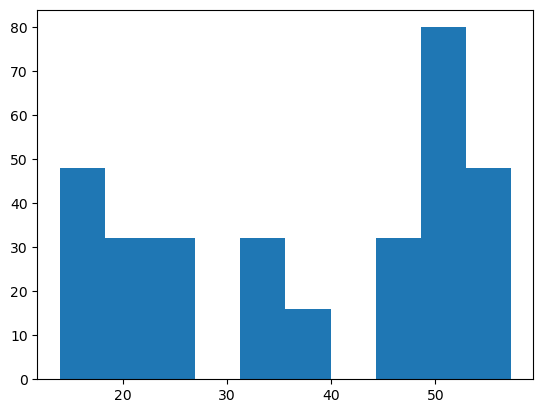

In [61]:
plt.hist(ds[1]);


In [62]:
plt.pie(rating_vals,labels=distinct_rating_label,autopct='%.0f%%');


NameError: name 'rating_vals' is not defined

In [64]:
rating_vals=ds[1].value_counts()
print(rating_vals)


51.77    16
53.74    16
51.33    16
37.59    16
23.88    16
57.25    16
35.02    16
52.29    16
17.46    16
20.66    16
13.99    16
52.15    16
22.60    16
17.93    16
33.34    16
22.65    16
54.23    16
47.82    16
50.10    16
45.17    16
Name: 1, dtype: int64


In [66]:
distinct_rating_label=ds[1].unique()
print(distinct_rating_label)

[51.77 53.74 50.1  47.82 54.23 22.65 33.34 17.93 22.6  52.15 13.99 20.66
 17.46 52.29 35.02 57.25 23.88 37.59 51.33 45.17]


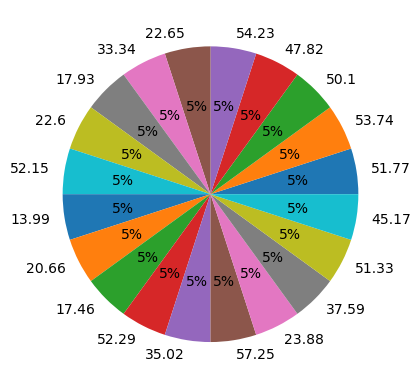

In [67]:
plt.pie(rating_vals,labels=distinct_rating_label,autopct='%.0f%%');


<AxesSubplot:xlabel='1', ylabel='Count'>

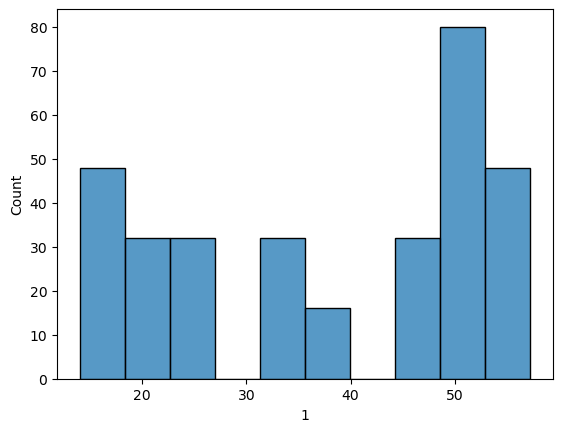

In [70]:
sns.histplot(ds[1])